# Assignment #01

# **Question 1: Image Convolution and Gaussian Filter**

## Importing Necessary Libraries

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.metrics import structural_similarity as ssim

###1a. Grayscale Image Convolution with 2D Filter (2 Points)

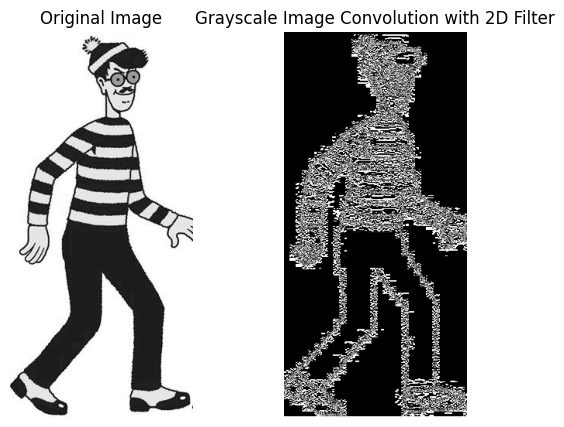

In [20]:
def convolve2d(image, kernel):
    """
    Perform a 2D convolution of a grayscale image with a given kernel.
    Args:
    - image: 2D numpy array representing the grayscale image
    - kernel: 2D numpy array representing the filter/kernel

    Returns:
    - convolved_image: 2D numpy array of the same size as the input image
    """
    # Get image and kernel dimensions
    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    
    Zero_Padded = np.pad(image, ((kernel_height // 2, kernel_height // 2), 
                                 (kernel_width // 2, kernel_width // 2)), 
                         mode='constant', constant_values=0)
    convolved_image = np.zeros_like(image)
    
    height_pointer = 0
    while height_pointer < img_height:
        width_pointer = 0
        while width_pointer < img_width:
            region = Zero_Padded[height_pointer:height_pointer+kernel_height, 
                                 width_pointer:width_pointer+kernel_width]
            convolved_image[height_pointer, width_pointer] = np.sum(region * kernel)
            width_pointer += 1
        height_pointer += 1

    return convolved_image


# Example of how to use the function
image = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
convolved_image = convolve2d(image, sobel_y)

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display Grayscale Image Convolution with 2D Filter
plt.subplot(1, 3, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title("Grayscale Image Convolution with 2D Filter")
plt.axis("off")

plt.show()


###1b. RGB Image Convolution with 3D Filter (1 Point)

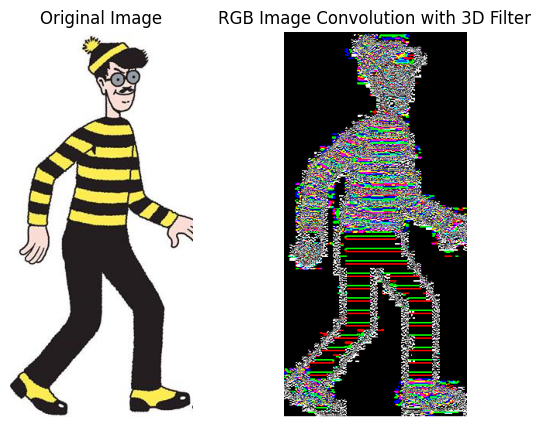

In [21]:
def convolve_image(image, kernel):
    """
    Perform a convolution on either a grayscale or an RGB image using 2D or 3D filters.
    Args:
    - image: 2D or 3D numpy array (grayscale or RGB image)
    - kernel: 2D or 3D numpy array (filter)
    
    Returns:
    - convolved_image: numpy array of the same size as the input image
    """
    # Get image and kernel dimensions
    img_height, img_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    
    img_d = image.shape[2]
    kernel_d = kernel.shape[2]
    assert img_d == kernel_d, "Kernel depth must match the image depth (3 for RGB)."
    
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2), 
                                  (kernel_width // 2, kernel_width // 2), (0, 0)), 
                          mode='constant', constant_values=0)
    convolved_image = np.zeros_like(image)
    
    height_pointer = 0
    while height_pointer < img_height:
        width_pointer = 0
        while width_pointer < img_width:
            depth_pointer = 0
            while depth_pointer < img_d:
                region = padded_image[height_pointer:height_pointer+kernel_height, 
                                      width_pointer:width_pointer+kernel_width, depth_pointer]
                convolved_image[height_pointer, width_pointer, depth_pointer] = np.sum(region * kernel[:, :, depth_pointer])
                depth_pointer += 1
            width_pointer += 1
        height_pointer += 1
    
    return convolved_image



image = cv2.imread('template.png')
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Convert the 2D Sobel kernel into a 3D kernel for RGB
sobel_y_3d = np.stack([sobel_y] * 3, axis=-1)

# Perform convolution (works for both grayscale and RGB)
convolved_rgb_image = convolve_image(image, sobel_y_3d)

# Plotting the images
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display RGB Image Convolution with 3D Filter
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(convolved_rgb_image, cv2.COLOR_BGR2RGB))
plt.title("RGB Image Convolution with 3D Filter")
plt.axis("off")

plt.show()


### Convolve the attached waldo.png with a (2D) Gaussian filter with σ = 1 and visualize the result (display the result of the convolution). You can use built-in functions for convolution. (1 Point)

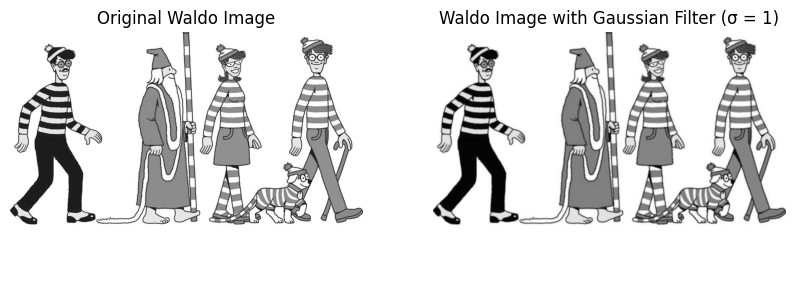

In [22]:
# Code for (2D) Gaussian filter with σ = 1 will go here
image = cv2.imread('waldo.png', cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian filter with σ = 1
gaussian_filtered_image = gaussian_filter(image, sigma=1)

# Visualize the result
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Waldo Image")
plt.axis("off")

# Display image after applying Gaussian filter
plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title("Waldo Image with Gaussian Filter (σ = 1)")
plt.axis("off")

plt.show()


##-----------------------------------------------************************----------------------------------------------------

## Question 2: Implement Canny Edge Detection from Scratch







## 2a. Compute Gradient Magnitude for Images. Compute magnitude of gradients for the attached images waldo.png and template.png. (1 Point)

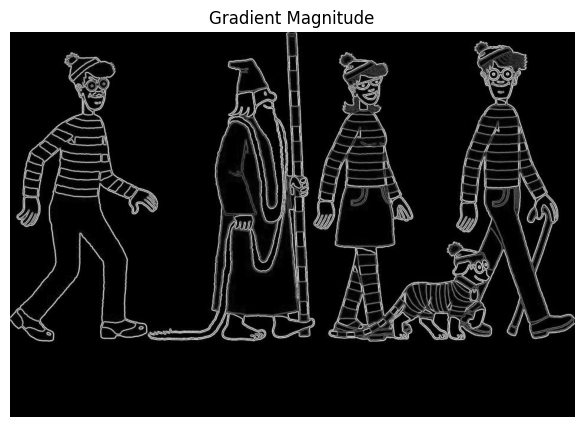

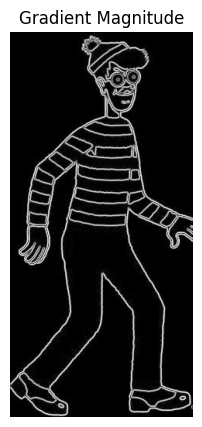

In [23]:
def compute_gradient_magnitude(image, use_scharr=False):
    """
    Compute the magnitude of gradients for an image.
    Args:
    - image: Grayscale image (2D numpy array)

    Returns:
    - gradient_magnitude: 2D numpy array representing gradient magnitudes
    """
    # Compute gradients using Sobel or Scharr operators
    if use_scharr:
        grad_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
        grad_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    else:
        grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the magnitude of the gradients
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Normalize the result for better visualization
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
    
    return gradient_magnitude

# Example usage:
image = cv2.imread('waldo.png', cv2.IMREAD_GRAYSCALE)
gradient_magnitude = compute_gradient_magnitude(image)

# Display the gradient magnitude
plt.figure(figsize=(10, 5))

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

# Example usage 2: 
image = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)
gradient_magnitude = compute_gradient_magnitude(image)

# Display the gradient magnitude
plt.figure(figsize=(10, 5))

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()

## 2b. MyCannyEdgeDetector Function (3 Point)

### Key Stages of Canny Edge Detection (Explanation)

Explain the key stages of the Canny edge detection algorithm in detail. Your explanation should cover:

1. **Noise Reduction**
2. **Gradient Calculation**
3. **Non-Maximum Suppression**
5. **Edge Tracking by Hysteresis**

Write your response in the markdown cell below.

### Load the image

In [24]:
image_path = 'test_image.png'  # Replace with your image path

image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale

####Noise Reduction (Gaussian Blur)

1. The purpose of this step is to reduce image noise, which can cause false edges to be detected during the edge detection process. A Gaussian blur smooths the image, reducing high-frequency noise and irrelevant detail.
2. cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma) applies a Gaussian filter to the image.
3. The function computes a weighted average of the neighboring pixels for each pixel in the image. The weighting is determined by the Gaussian kernel.

In [25]:
def apply_gaussian_blur(img, kernel_size=5):
    smoothed_image = cv2.GaussianBlur(img, (kernel_size, kernel_size), 1)
    return smoothed_image

####Gradient Calculation (using Sobel filters)

We use Sobel filters to compute gradients in the x and y directions. The gradient magnitude and angle are calculated from these derivatives.

1. cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) computes the horizontal gradient (grad_x)
2. cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) computes the vertical gradient (grad_y)
3. The grad_x and grad_y values represent the rate of change in the horizontal and vertical directions. The gradient magnitude is computed by combining these two gradients
4. The gradient direction is computed using the arctangent of the ratio between grad_y and grad_x. The function np.arctan2(grad_y, grad_x) ensures that the correct quadrant is considered when computing the angle

In [26]:
def calculate_gradients(img):
    # Gradient in x and y directions using Sobel filters
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute gradient magnitude and angle
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_angle = np.arctan2(grad_y, grad_x) * (180 / np.pi)
    
    return gradient_magnitude, gradient_angle

####Function for Non-Maximum Suppression

1. Step 1: Gradients can point in any direction, but for edge detection, we only care about their direction within a 180-degree range (since opposite directions, like 0° and 180°, are essentially the same for detecting edges).
2. Angles like 0°, 45°, 90°, and 135° are canonical edge directions corresponding to horizontal, diagonal, and vertical edges. But gradients can take any value between 0° and 180°, so we use ranges centered around these canonical angles, like 22.5°, 67.5°, etc., to cover those in-between angles.
3. Step 2: we group gradients into four broad categories:
    1. 0° (Horizontal): We check the left and right neighbors along the horizontal direction.
    2. 45° (Diagonal ): We check the diagonal neighbors (top-right and bottom-left).
    3. 90° (Vertical): We check the neighbors above and below (vertical direction).
    4. 135° (Diagonal /): We check the diagonal neighbors (top-left and bottom-right).
4. Step 3: For each pixel, based on its gradient angle, we determine the appropriate neighboring pixels to compare:
    1. If the gradient angle is close to 0° (horizontal), we compare with neighbors to the left and right.
    2. If the gradient angle is around 90° (vertical), we compare with neighbors above and below.
    3. For other angles (e.g., 45°, 135°), we use diagonal neighbors.
5. Last Step: Suppress Non-Maximal Pixels
    1. If the current pixel's gradient magnitude is greater than or equal to its neighbors' magnitudes in the gradient direction, we remain the value
    2. Otherwise, it gets suppressed (set to 0)

In [27]:
def non_maximum_suppression(gradient_magnitude, gradient_angle):
    """
    Non-Maximum Suppression (NMS) using angles in degrees.
    Args:
    - gradient_magnitude: 2D array of gradient magnitudes.
    - gradient_angle: 2D array of gradient directions (angles in degrees).
    
    Returns:
    - suppressed_image: 2D array with suppressed non-maximum values.
    """
    img_height, img_width = gradient_magnitude.shape
    suppressed_image = np.zeros((img_height, img_width), dtype=np.float32)

    gradient_angle = gradient_angle % 180

    i = 1
    while i < img_height - 1:
        j = 1
        while j < img_width - 1:
            angle = gradient_angle[i, j]
            magnitude = gradient_magnitude[i, j]

            if (0 <= angle < 45/2) or ((180 - 45/2) <= angle <= 180):  # Horizontal
                neighbors = [gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]]
            elif (45/2 <= angle < (90 - 45/2)):  # Diagonal /
                neighbors = [gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]]
            elif ((90 - 45/2) <= angle < (90 + 45/2)):  # Vertical
                neighbors = [gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]]
            else:  # Diagonal \
                neighbors = [gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]]

            if magnitude >= max(neighbors):
                suppressed_image[i, j] = magnitude
            else:
                suppressed_image[i, j] = 0

            j += 1
        i += 1

    return suppressed_image


####Function for Hysteresis Thresholding

1. Step 1: Evaluates every pixel in the image based on its intensity, comparing it to the high_threshold and low_threshold
    1. If a pixel's value is greater than or equal to the high_threshold, it’s classified as a strong edge and marked as 1 (which will remain an edge).
    2. If a pixel's value is between the low_threshold and high_threshold, it’s temporarily marked as a weak edge with a value of 0.5. This step is important because weak edges may become edges if they are connected to strong edges
    3. Any pixel below the low_threshold is not considered an edge and remains 0.
2. Step 2: Analyze those edges that marked as 0.5. A 0.5 edge will only become a strong edge if it’s connected to another strong edge.
    1. For each weak edge (0.5), the code checks its neighboring pixels
    2. If any of the neighbors is a strong edge (1), the weak edge is promoted to a strong edge (1)
    3. Otherwise, if no neighboring pixels are strong edges, the weak edge is suppressed and converted to a non-edge (0)
3. Final Output: The result is a binary image where 1 represents edges and 0 represents non-edges

In [28]:
def hysteresis_thresholding(suppressed_image, low_threshold, high_threshold):
    """
    Perform hysteresis thresholding to detect strong and weak edges using binary outputs.
    Args:
    - suppressed_image: 2D array after non-maximum suppression
    - low_threshold: Low threshold for hysteresis
    - high_threshold: High threshold for hysteresis

    Returns:
    - edge_image: Binary image after hysteresis thresholding (0 = non-edge, 1 = edge)
    """
    img_height, img_width = suppressed_image.shape
    edge_image = np.zeros((img_height, img_width), dtype=np.uint8)

    # Iterate through each pixel and classify as strong or weak
    height_pointer = 0
    while height_pointer < img_height:
        width_pointer = 0
        while width_pointer < img_width:
            if suppressed_image[height_pointer, width_pointer] >= high_threshold:
                edge_image[height_pointer, width_pointer] = 1  # Strong edge
            elif low_threshold <= suppressed_image[height_pointer, width_pointer] < high_threshold:
                edge_image[height_pointer, width_pointer] = 0.5  # Weak edge (temporary)
            width_pointer += 1
        height_pointer += 1

    # Convert weak edges connected to strong edges into strong edges
    i = 1
    while i < img_height - 1:
        j = 1
        while j < img_width - 1:
            if edge_image[i, j] == 0.5:
                if 1 in edge_image[i-1:i+2, j-1:j+2]:
                    edge_image[i, j] = 1  # Promote to strong edge
                else:
                    edge_image[i, j] = 0  # Turn into non-edge
            j += 1
        i += 1

    return edge_image


####Main Function for Canny Edge Detection

In [29]:
def MyCannyEdgeDetector(image, low_threshold, high_threshold):
    """
    Custom implementation of the Canny Edge Detector.
    Args:
    - image: Grayscale or RGB image (as numpy array)
    - threshold: Threshold value for edge detection

    Returns:
    - edge_image: Binary edge-detected image
    """

    # Apply Gaussian filter
    smoothed_image = apply_gaussian_blur(image, kernel_size=5)

    # Compute gradients
    gradient_magnitude, gradient_angle = calculate_gradients(smoothed_image)

    # Perform non-maximum suppression
    suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_angle)

    # Apply hysteresis thresholding
    edge_image = hysteresis_thresholding(suppressed_image, low_threshold=low_threshold, high_threshold=high_threshold)

    return edge_image


####Apply your custom Canny function and  built-in OpenCV Canny function

*Select the low and high thresholds according to your preference*



In [30]:
# Apply your custom Canny function
custom_edges = MyCannyEdgeDetector(gray_image, low_threshold=50, high_threshold=150)

# Apply the built-in OpenCV Canny function for comparison
opencv_edges = cv2.Canny(gray_image, 50, 150)

####Compute the Structural Similarity Index Measure (SSIM) of the edges with your defined code and inbuilt commands here (2 Point).


In [31]:

def calculate_ssim(custom_edges, opencv_edges):
    """
    Calculate the Structural Similarity Index (SSIM) between two edge-detected images.

    Args:
    - custom_edges: 2D numpy array of edges from custom Canny edge detection
    - opencv_edges: 2D numpy array of edges from OpenCV's Canny edge detection

    Returns:
    - similarity_index: SSIM between the custom and OpenCV edge-detected images
    """

    # Ensure both images are in the same format (either binary or grayscale)
    similarity_index, _ = ssim(custom_edges, opencv_edges, full=True)

    return similarity_index


# Calculate SSIM
ssim_value = calculate_ssim(custom_edges, opencv_edges)

# Print SSIM result
print(f"SSIM between custom Canny and OpenCV Canny: {ssim_value:.4f}")


SSIM between custom Canny and OpenCV Canny: 0.5151


###Visualize the results

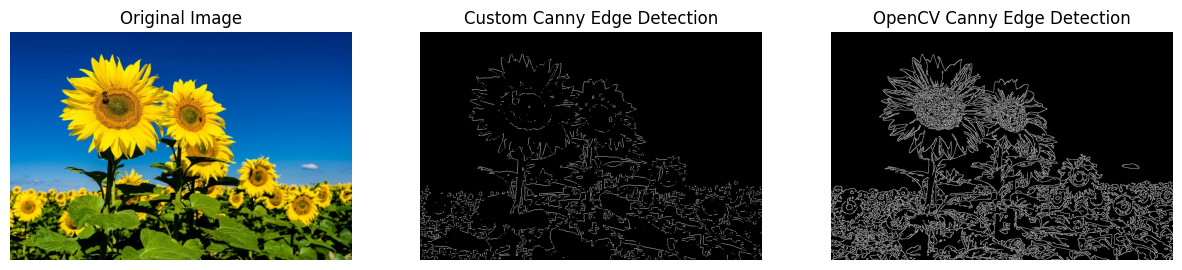

In [32]:
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display custom Canny edge result
plt.subplot(1, 3, 2)
plt.imshow(custom_edges, cmap='gray')
plt.title("Custom Canny Edge Detection")
plt.axis("off")

# Display OpenCV's Canny edge result
plt.subplot(1, 3, 3)
plt.imshow(opencv_edges, cmap='gray')
plt.title("OpenCV Canny Edge Detection")
plt.axis("off")

plt.show()

###Bonus Question: Limitations and Improvements

Discuss potential limitations of the Canny edge detection algorithm. Suggest how it could be improved for images with complex textures or lighting conditions.
1. Limitation:
    1. Even though the Canny algorithm begins with a Gaussian smoothing step to reduce noise, it can still be sensitive to high levels of noise.
    2. The Canny algorithm seems to struggle with images that have complex textures.
2. Improvements:
    1. Instead of using static threshold values, adaptive thresholding could be applied
    2. Instead of using normal edge detection, incorporating multi-scale edge detection can help detect edges at various levels of detail.
